## W3_Hw11

Go ahead and modify three plots of your choice from today's lecture by using what we have learned and also at least three additional features from the matplotlib gallery that we have not covered in the lecture!

Here are some tips for colors:

Colors can be specified by single letters:

    k - black
    w - white
    c - cyan
    m - magenta
    b - blue
    r - red
    y - yellow

or by html color codes ('red', 'orange', 'steelblue', etc)

or by hex color codes (#BDA493, #63C638, etc - A very handy color picker can be found here)

In [11]:
# read the file 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df_asthma = pd.read_csv("../datasets/asthma.csv")

In [12]:
df_subset = df_asthma[df_asthma['Strata Name']=='All Ages']
df_pivot = df_subset.pivot( values='Rate', 
                            columns='Year', 
                            index='Geography'
                          )

In [6]:
df_subset3

,LGHC Indicator Name,Geography,Year,Age Group,Strata,Strata Name,Numerator,Rate,LGHC Indicator ID,LGHC Target Rate
243,Asthma ED Visit Rates,Alameda,2015,18 and Over,Sex,Female,"3,828",60.5,7,28
244,Asthma ED Visit Rates,Amador,2015,18 and Over,Sex,Female,113,79.4,7,28
245,Asthma ED Visit Rates,Butte,2015,18 and Over,Sex,Female,439,52.6,7,28
246,Asthma ED Visit Rates,Calaveras,2015,18 and Over,Sex,Female,96,59.4,7,28
247,Asthma ED Visit Rates,California,2015,18 and Over,Sex,Female,"73,315",49.2,7,28
...,...,...,...,...,...,...,...,...,...,...
9479,Asthma ED Visit Rates,Tulare,2019,Under 18,Sex,Male,597,81.2,7,28
9480,Asthma ED Visit Rates,Tuolumne,2019,Under 18,Sex,Male,37,90.0,7,28
9481,Asthma ED Visit Rates,Ventura,2019,Under 18,Sex,Male,602,61.0,7,28
9482,Asthma ED Visit Rates,Yolo,2019,Under 18,Sex,Male,135,52.4,7,28


Added the matplotlib style functionality to enable a dark background and the seaborn functionality to style the figure based on context. In this example, I used the talk context. And changed the x-axis from the Year column to the Age Group Column 

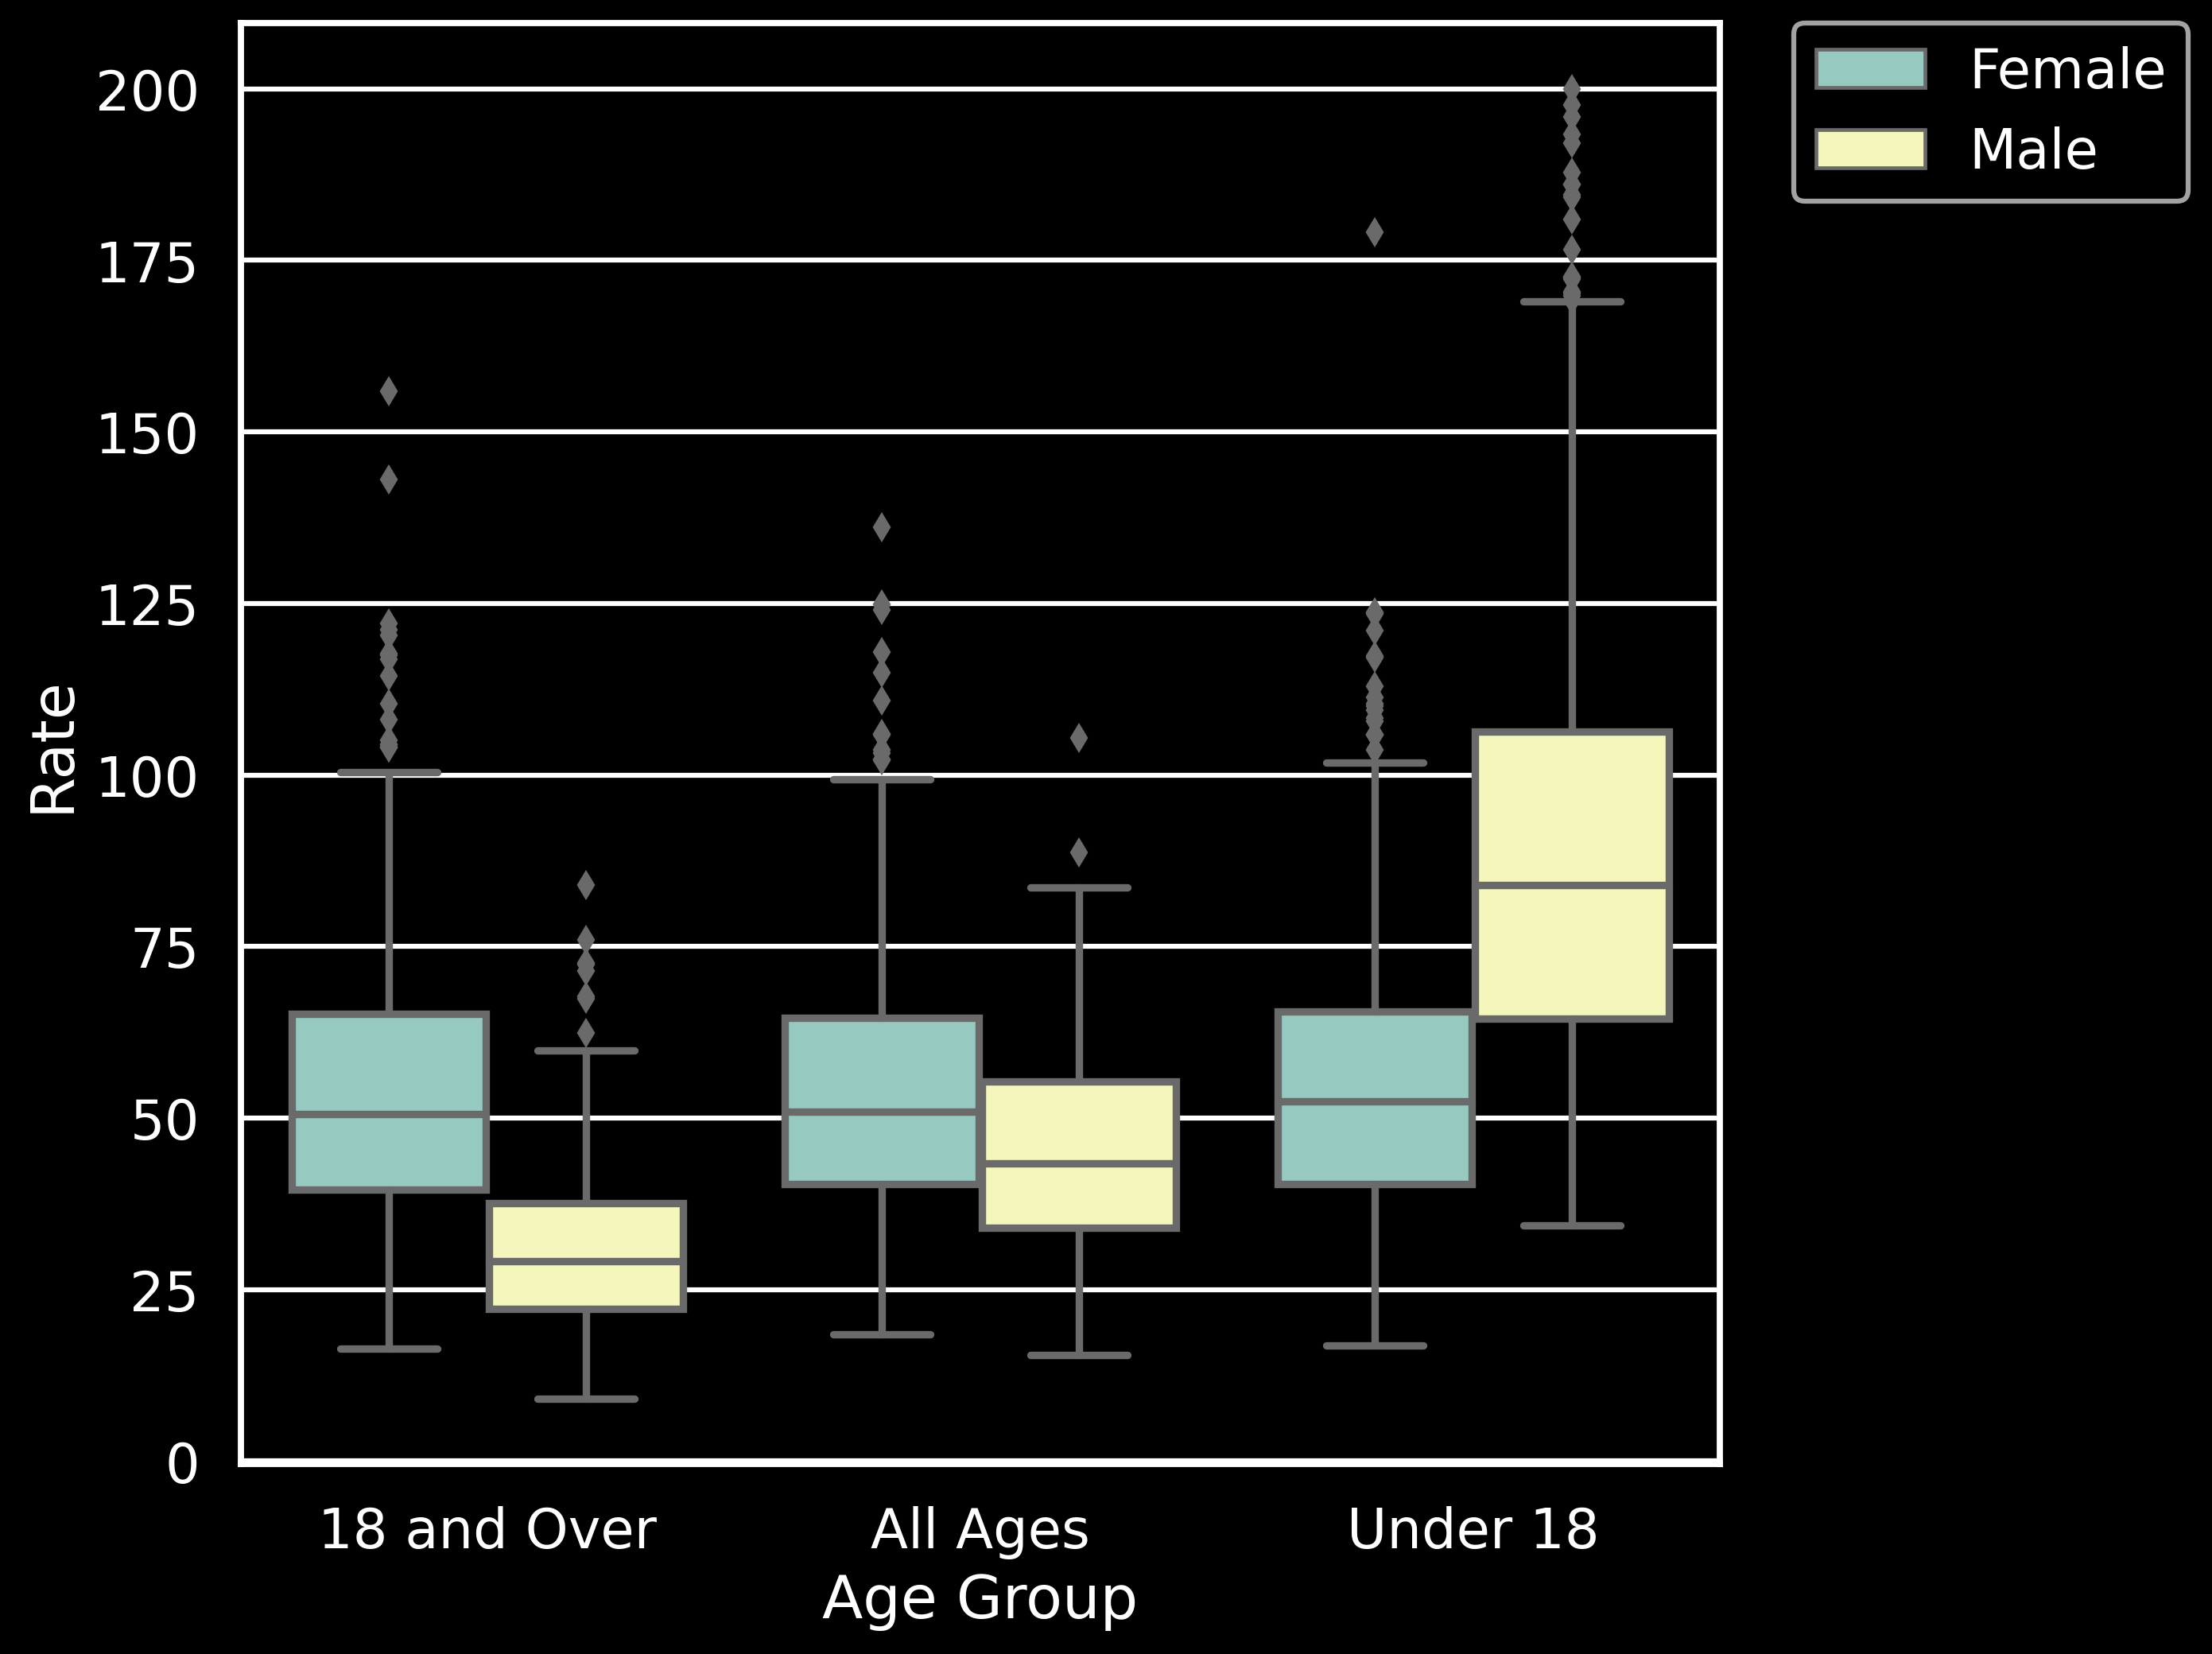

In [16]:
df_subset3 = df_asthma[df_asthma['Strata'] == 'Sex']
plt.style.use('dark_background')
sns.set_context("talk")
ax = sns.boxplot(data=df_subset3,
                 x='Age Group', y='Rate', hue='Strata Name',
                )

ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


Added the plt.tight_layout option which allows the figure to auto adjust the padding around the figure. Moreover, changed the plot from a boxplot to a striplot as this gives a better idea of the distribution of the years and makes it a bit easier to see the differentiation of distributions bewteen the different races. 

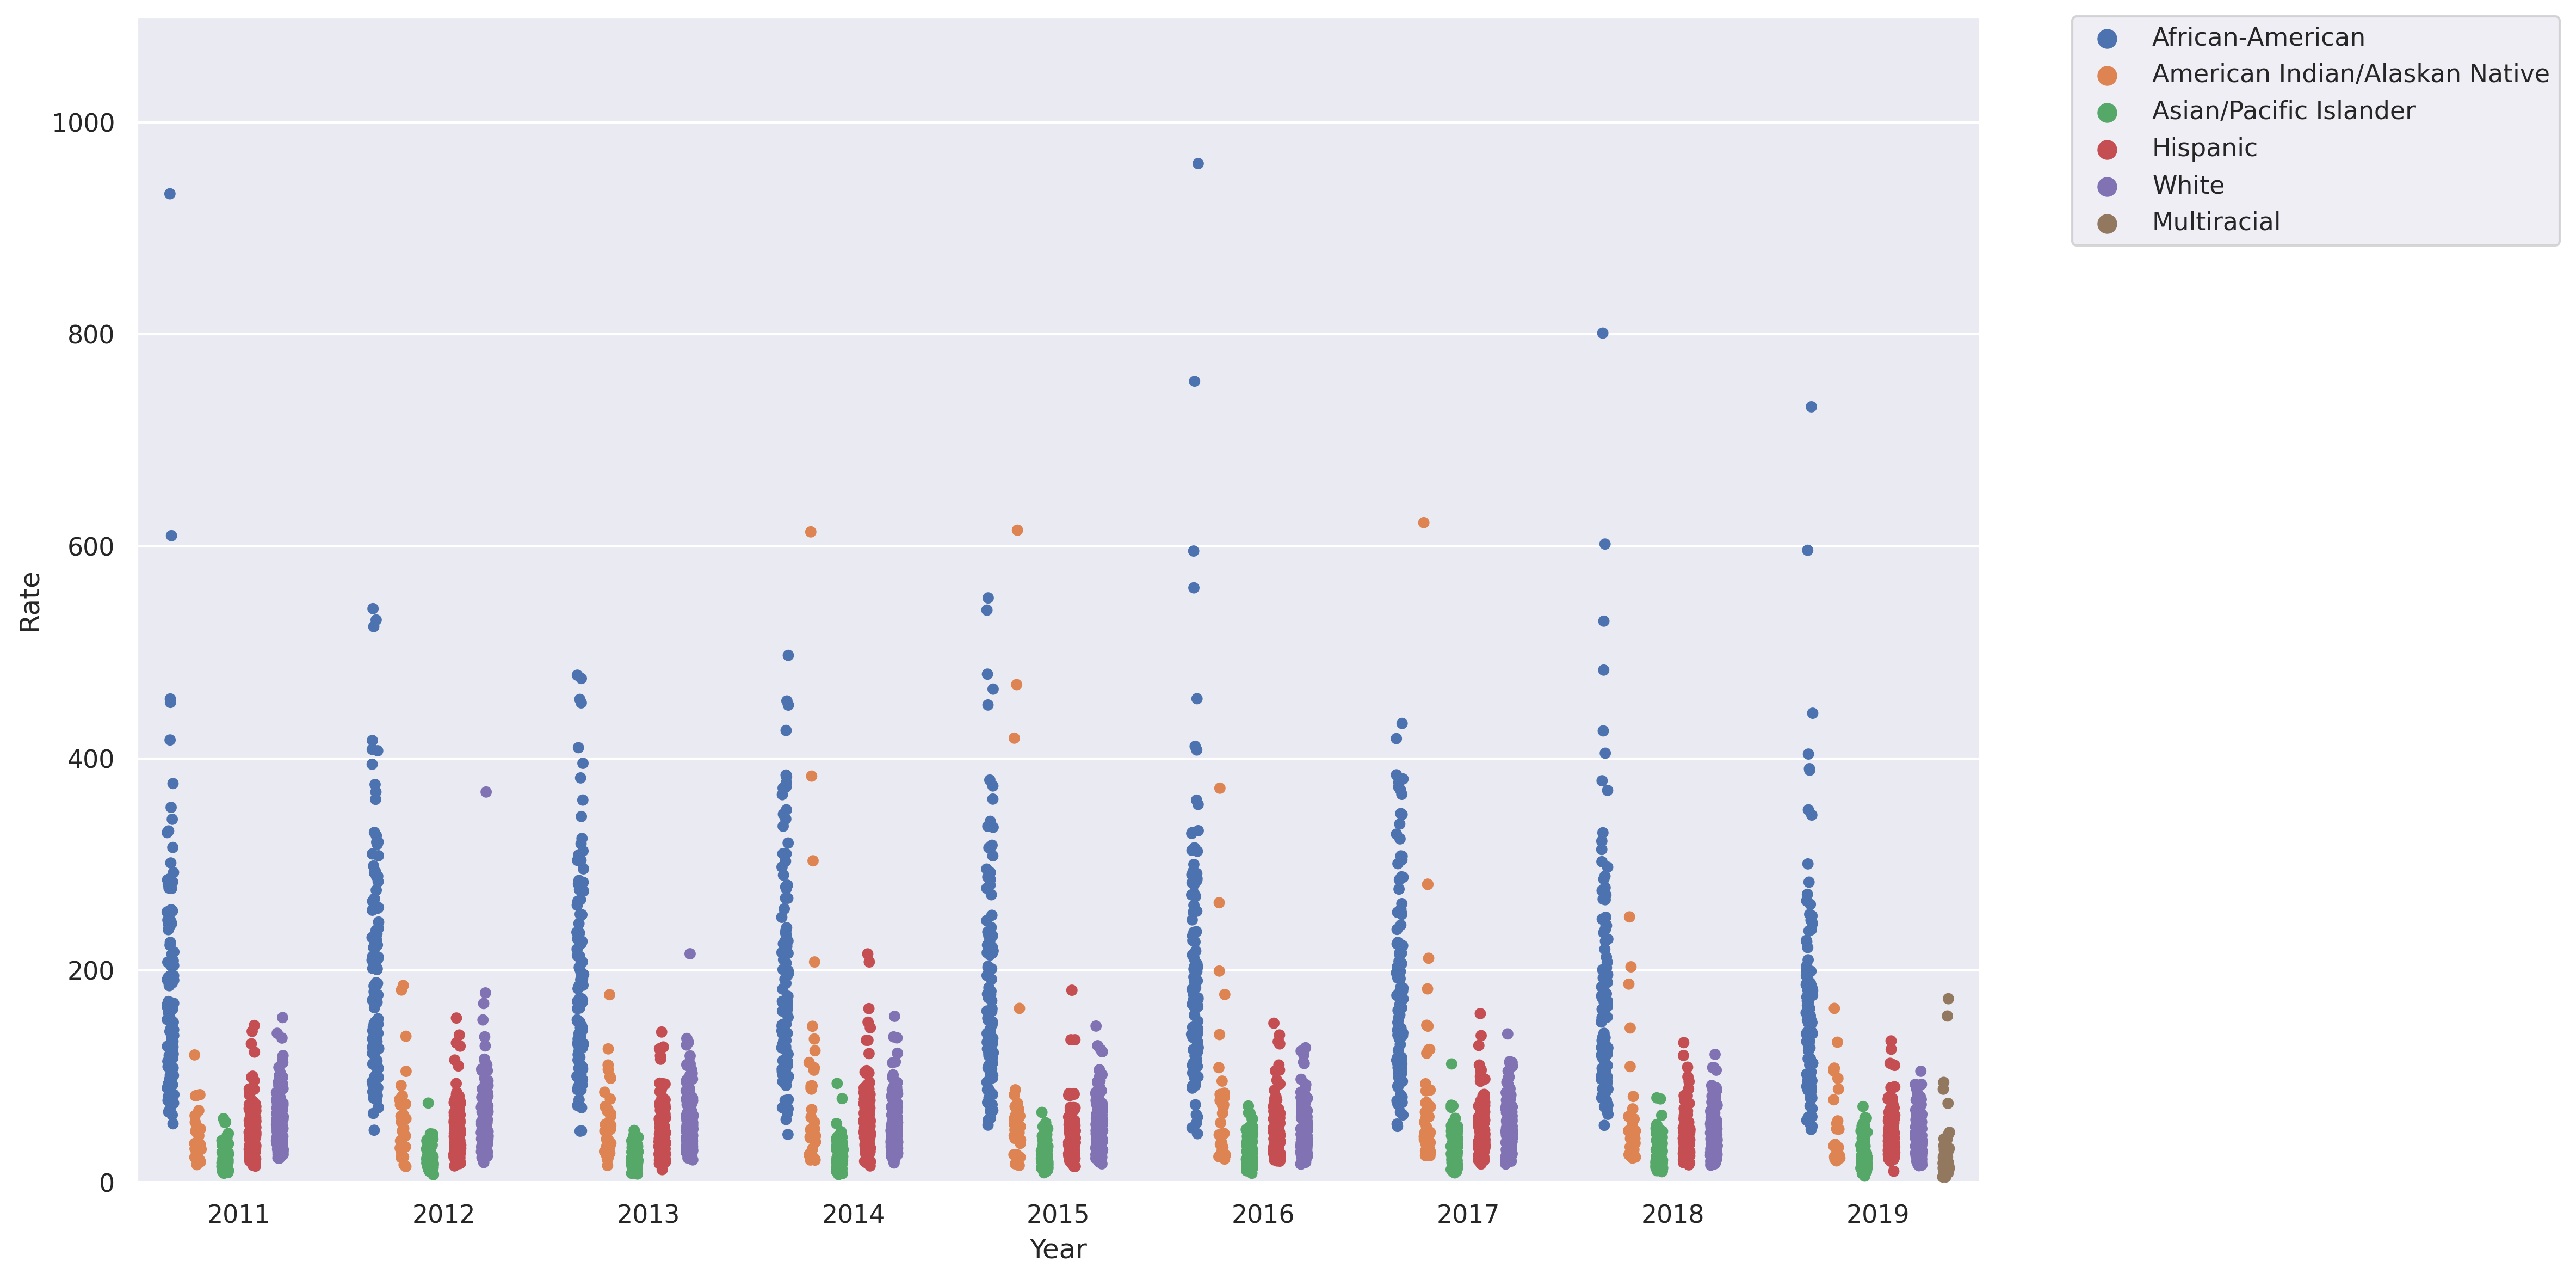

In [29]:
sns.set(rc = {'figure.figsize':(16,8),"figure.dpi":300})
#sns.set(rc= {"figure.dpi":300, 'savefig.dpi':300})
df_subset4 = df_asthma[df_asthma['Strata'] == 'Race-Ethnicity']
ax = sns.stripplot(data=df_subset4,
                 x='Year', y='Rate', hue='Strata Name', dodge=True)
ax.set_ylim([0,1100])
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()

Changed the plotting function from distplot to histplot as distplot is a deprecated function that isn't really used anymore to plot histograms in seaborn. In addition, changed the targeted dataset from df_subset to df_subset3 to incorportate the hue parameter to seperate the histogram based on Sex. Finally, added a dashed vertical line which represents the mean of the Rate column in df_subset3 dataframe using matplotlib's plt.axvline() plotting function. 

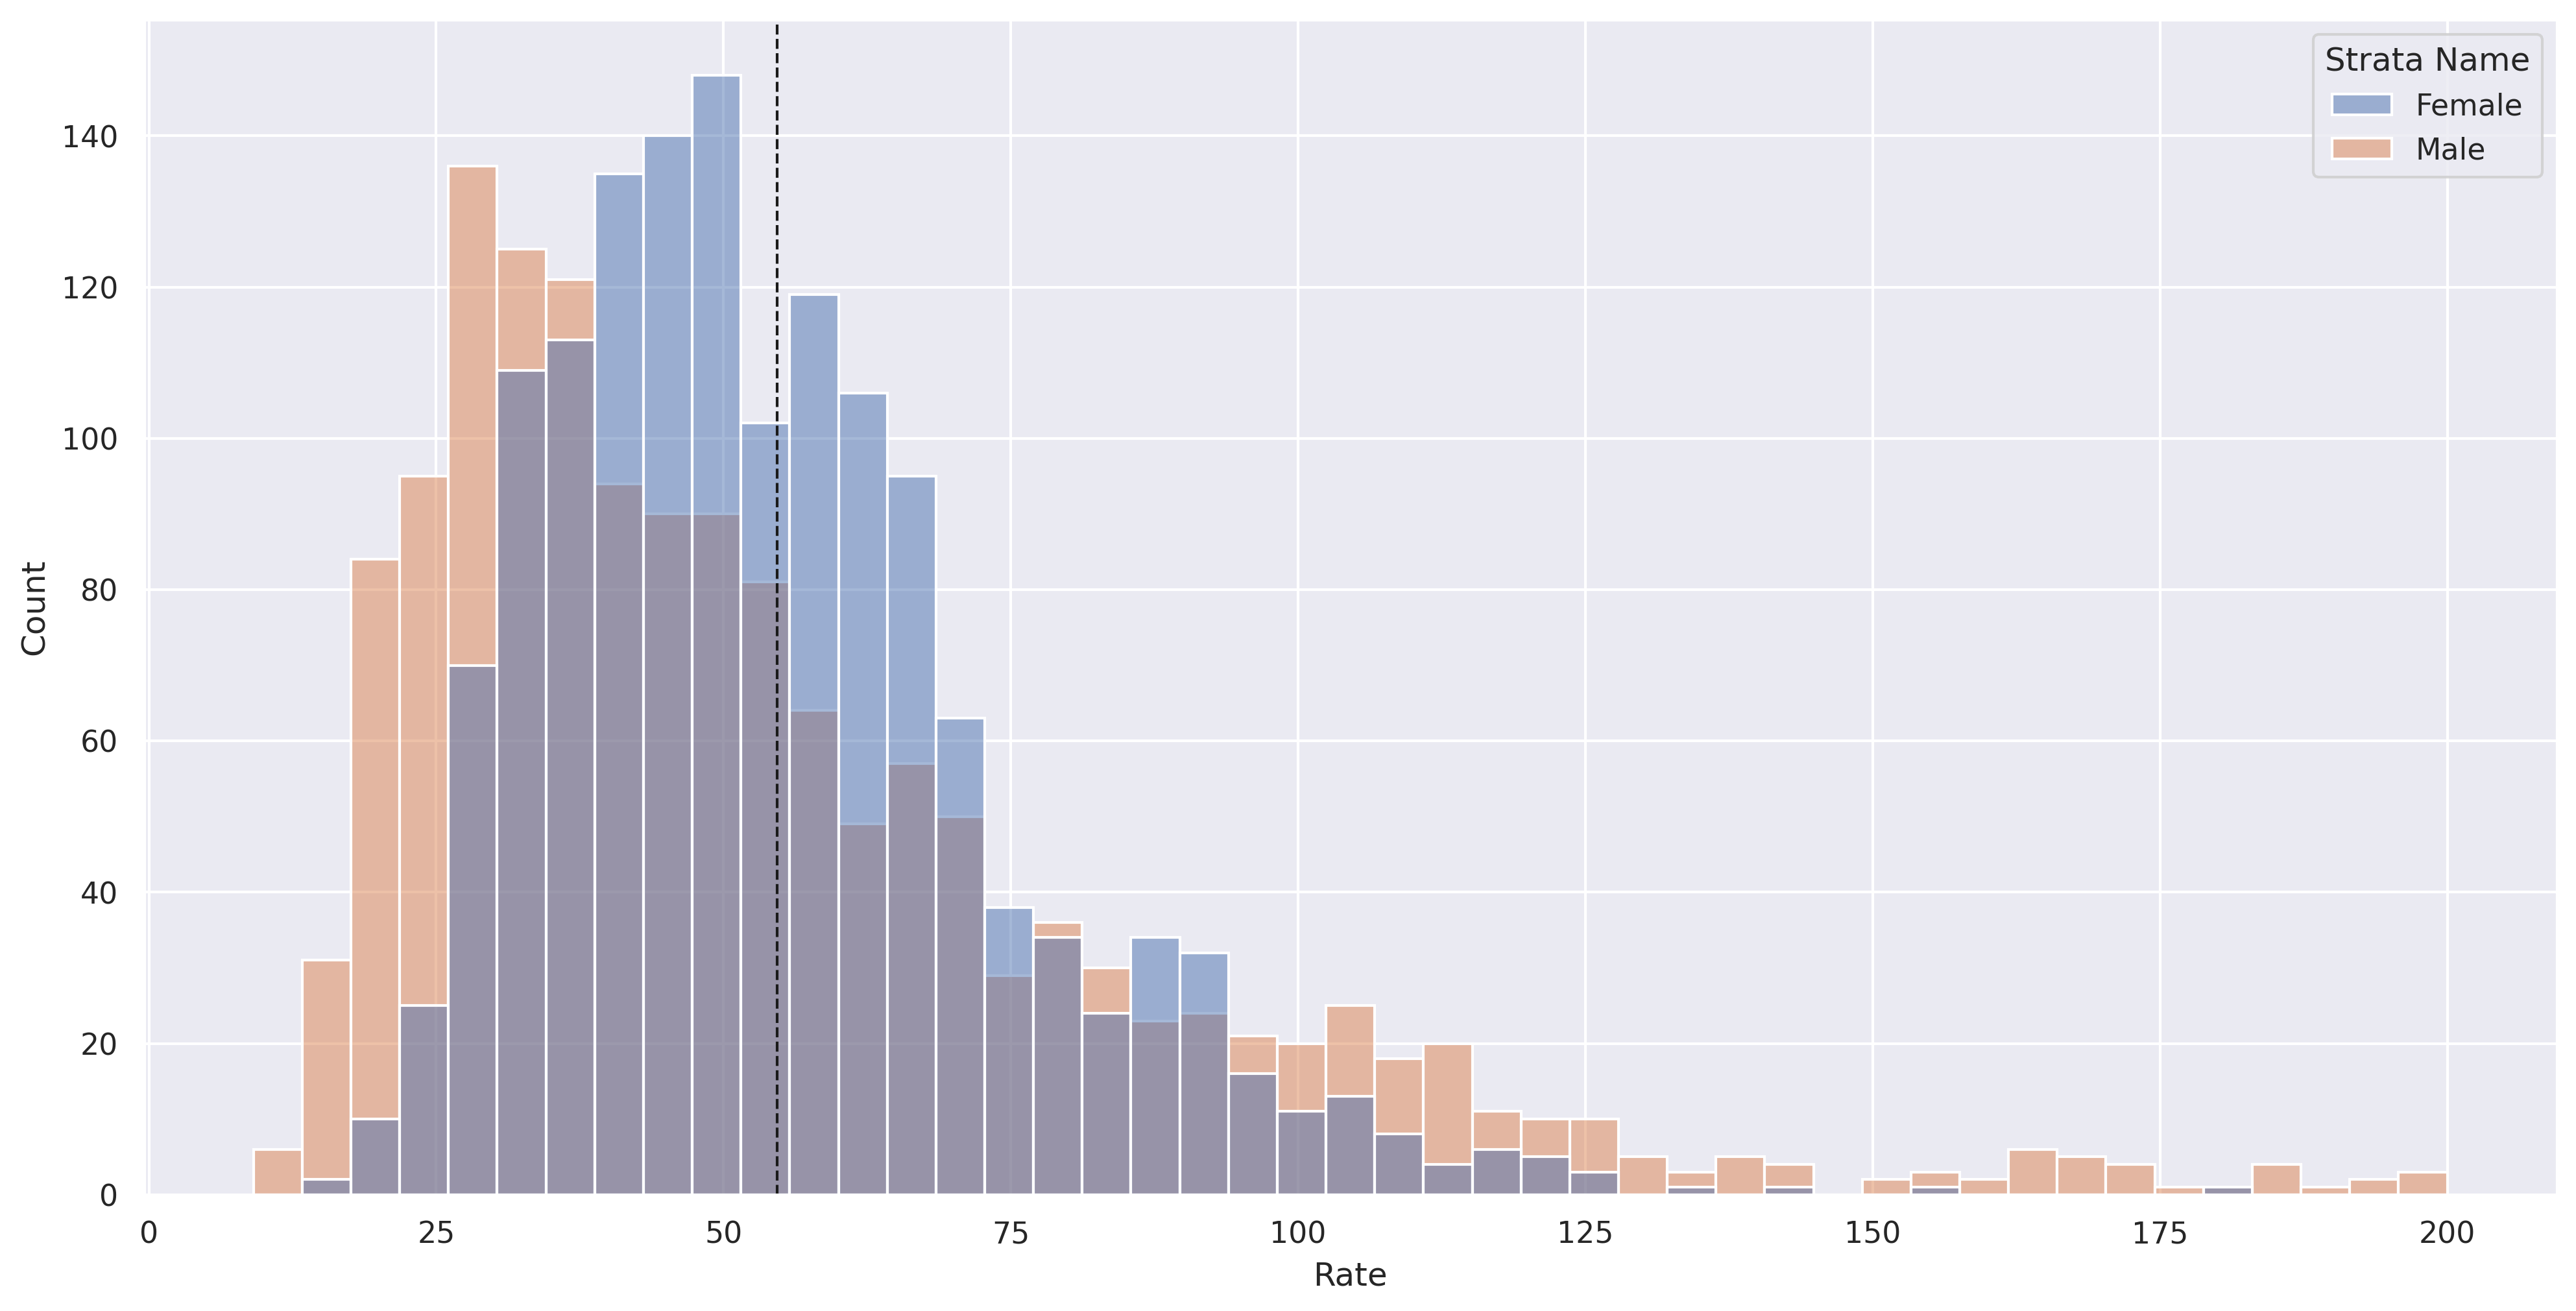

In [41]:
# histograms with Seaborn
sns.histplot(df_subset3,x="Rate", hue='Strata Name')
plt.axvline(df_subset3["Rate"].mean(), color='k', linestyle='dashed', linewidth=1)
plt.show()

## W3_HW12

Try creating a 3x3 grid for one of the plots you pick in W3_HW11, and placing the graphs in the top left and bottom right positions

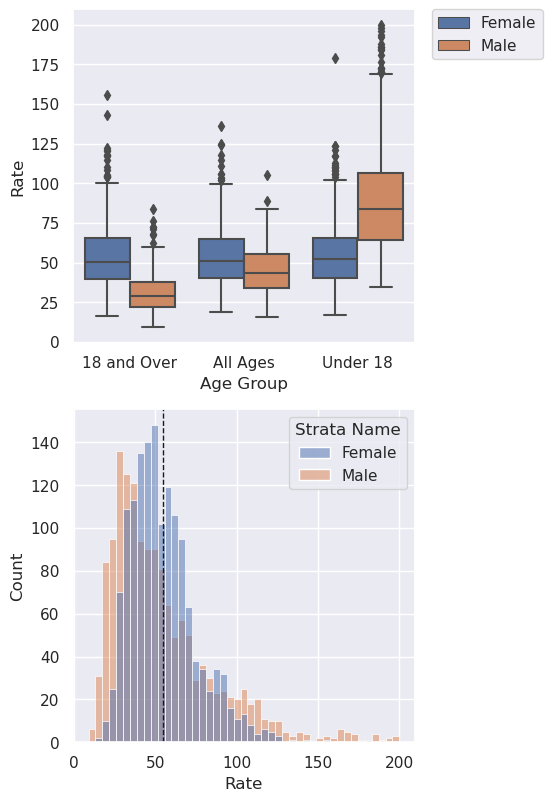

In [57]:
fig = plt.figure(figsize=(15,15), dpi=100)

fig.add_subplot(3,3,1)
ax = sns.boxplot(data=df_subset3,
                 x='Age Group', y='Rate', hue='Strata Name',
                )

ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

fig.add_subplot(3,3,4) 
sns.histplot(df_subset3,x="Rate", hue='Strata Name')
plt.axvline(df_subset3["Rate"].mean(), color='k', linestyle='dashed', linewidth=1)

plt.show()

## W3_HW13

Can you create a graph that shows the ED admission rate for each county, plotting under 18 against 18 and over, displaying separately each sex?

In [74]:
df_asthma['Age Group'].unique()
df_subset5=df_asthma[(df_asthma['Age Group'] == '18 and Over') | (df_asthma['Age Group'] == 'Under 18')]
df_subset5=df_subset5[df_subset5['Strata'] == 'Sex']

In [77]:
df_subset5["Geography"].unique()

array(['Alameda', 'Amador', 'Butte', 'Calaveras', 'California', 'Colusa',
       'Contra Costa', 'Del Norte', 'El Dorado', 'Fresno', 'Glenn',
       'Humboldt', 'Imperial', 'Inyo', 'Kern', 'Kings', 'Lake', 'Lassen',
       'Los Angeles', 'Madera', 'Marin', 'Mariposa', 'Mendocino',
       'Merced', 'Modoc', 'Mono', 'Monterey', 'Napa', 'Nevada', 'Orange',
       'Placer', 'Plumas', 'Riverside', 'Sacramento', 'San Benito',
       'San Bernardino', 'San Diego', 'San Francisco', 'San Joaquin',
       'San Luis Obispo', 'San Mateo', 'Santa Barbara', 'Santa Clara',
       'Santa Cruz', 'Shasta', 'Siskiyou', 'Solano', 'Sonoma',
       'Stanislaus', 'Sutter', 'Tehama', 'Trinity', 'Tulare', 'Tuolumne',
       'Ventura', 'Yolo', 'Yuba', 'Sierra'], dtype=object)

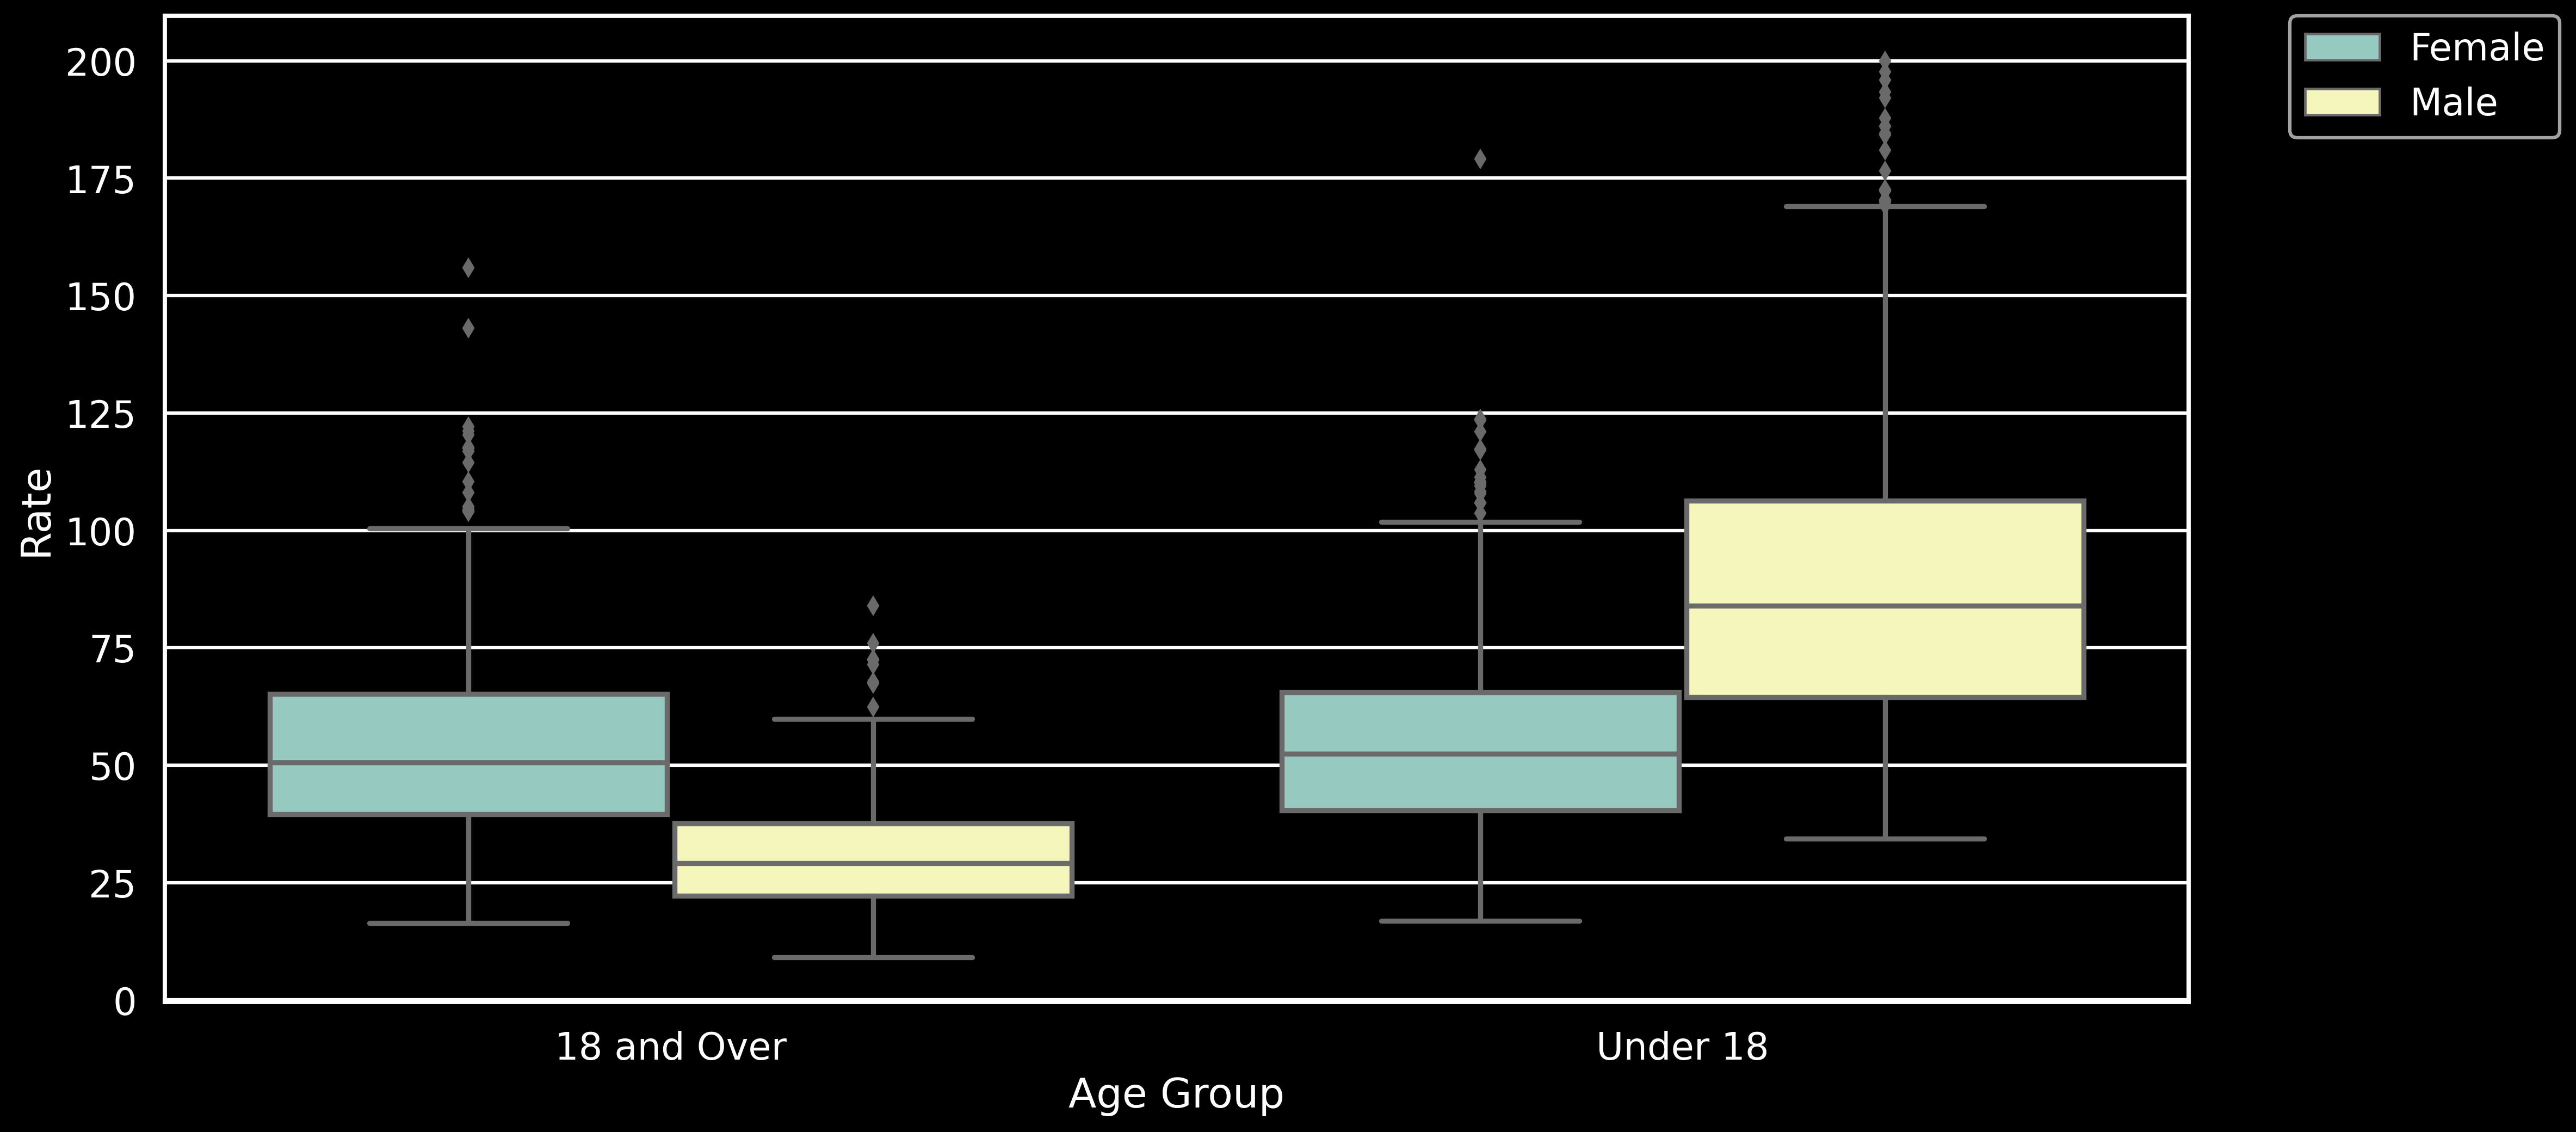

In [81]:
sns.set_context("talk")
ax = sns.boxplot(data=df_subset5,
                 x='Age Group', y='Rate', hue='Strata Name',
                )

ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# W3_HW14

Can you make the following boxplot look similar to the one we created using the df_pivot dataframe but instead, by using the original dataframe (df_asthma)? Hint: You will need to investigate your data, and may need to weed out the outliers.

    df_asthma.plot(x='Year', y='Rate', kind='box')
    plt.show()

In [83]:
df_asthma

,LGHC Indicator Name,Geography,Year,Age Group,Strata,Strata Name,Numerator,Rate,LGHC Indicator ID,LGHC Target Rate
0,Asthma ED Visit Rates,Alameda,2015,18 and Over,Total Population,18 and Over,"6,513",53.1,7,28
1,Asthma ED Visit Rates,Amador,2015,18 and Over,Total Population,18 and Over,151,49.1,7,28
2,Asthma ED Visit Rates,Butte,2015,18 and Over,Total Population,18 and Over,736,43.8,7,28
3,Asthma ED Visit Rates,Calaveras,2015,18 and Over,Total Population,18 and Over,139,42.7,7,28
4,Asthma ED Visit Rates,California,2015,18 and Over,Total Population,18 and Over,"117,854",40.0,7,28
...,...,...,...,...,...,...,...,...,...,...
9479,Asthma ED Visit Rates,Tulare,2019,Under 18,Sex,Male,597,81.2,7,28
9480,Asthma ED Visit Rates,Tuolumne,2019,Under 18,Sex,Male,37,90.0,7,28
9481,Asthma ED Visit Rates,Ventura,2019,Under 18,Sex,Male,602,61.0,7,28
9482,Asthma ED Visit Rates,Yolo,2019,Under 18,Sex,Male,135,52.4,7,28


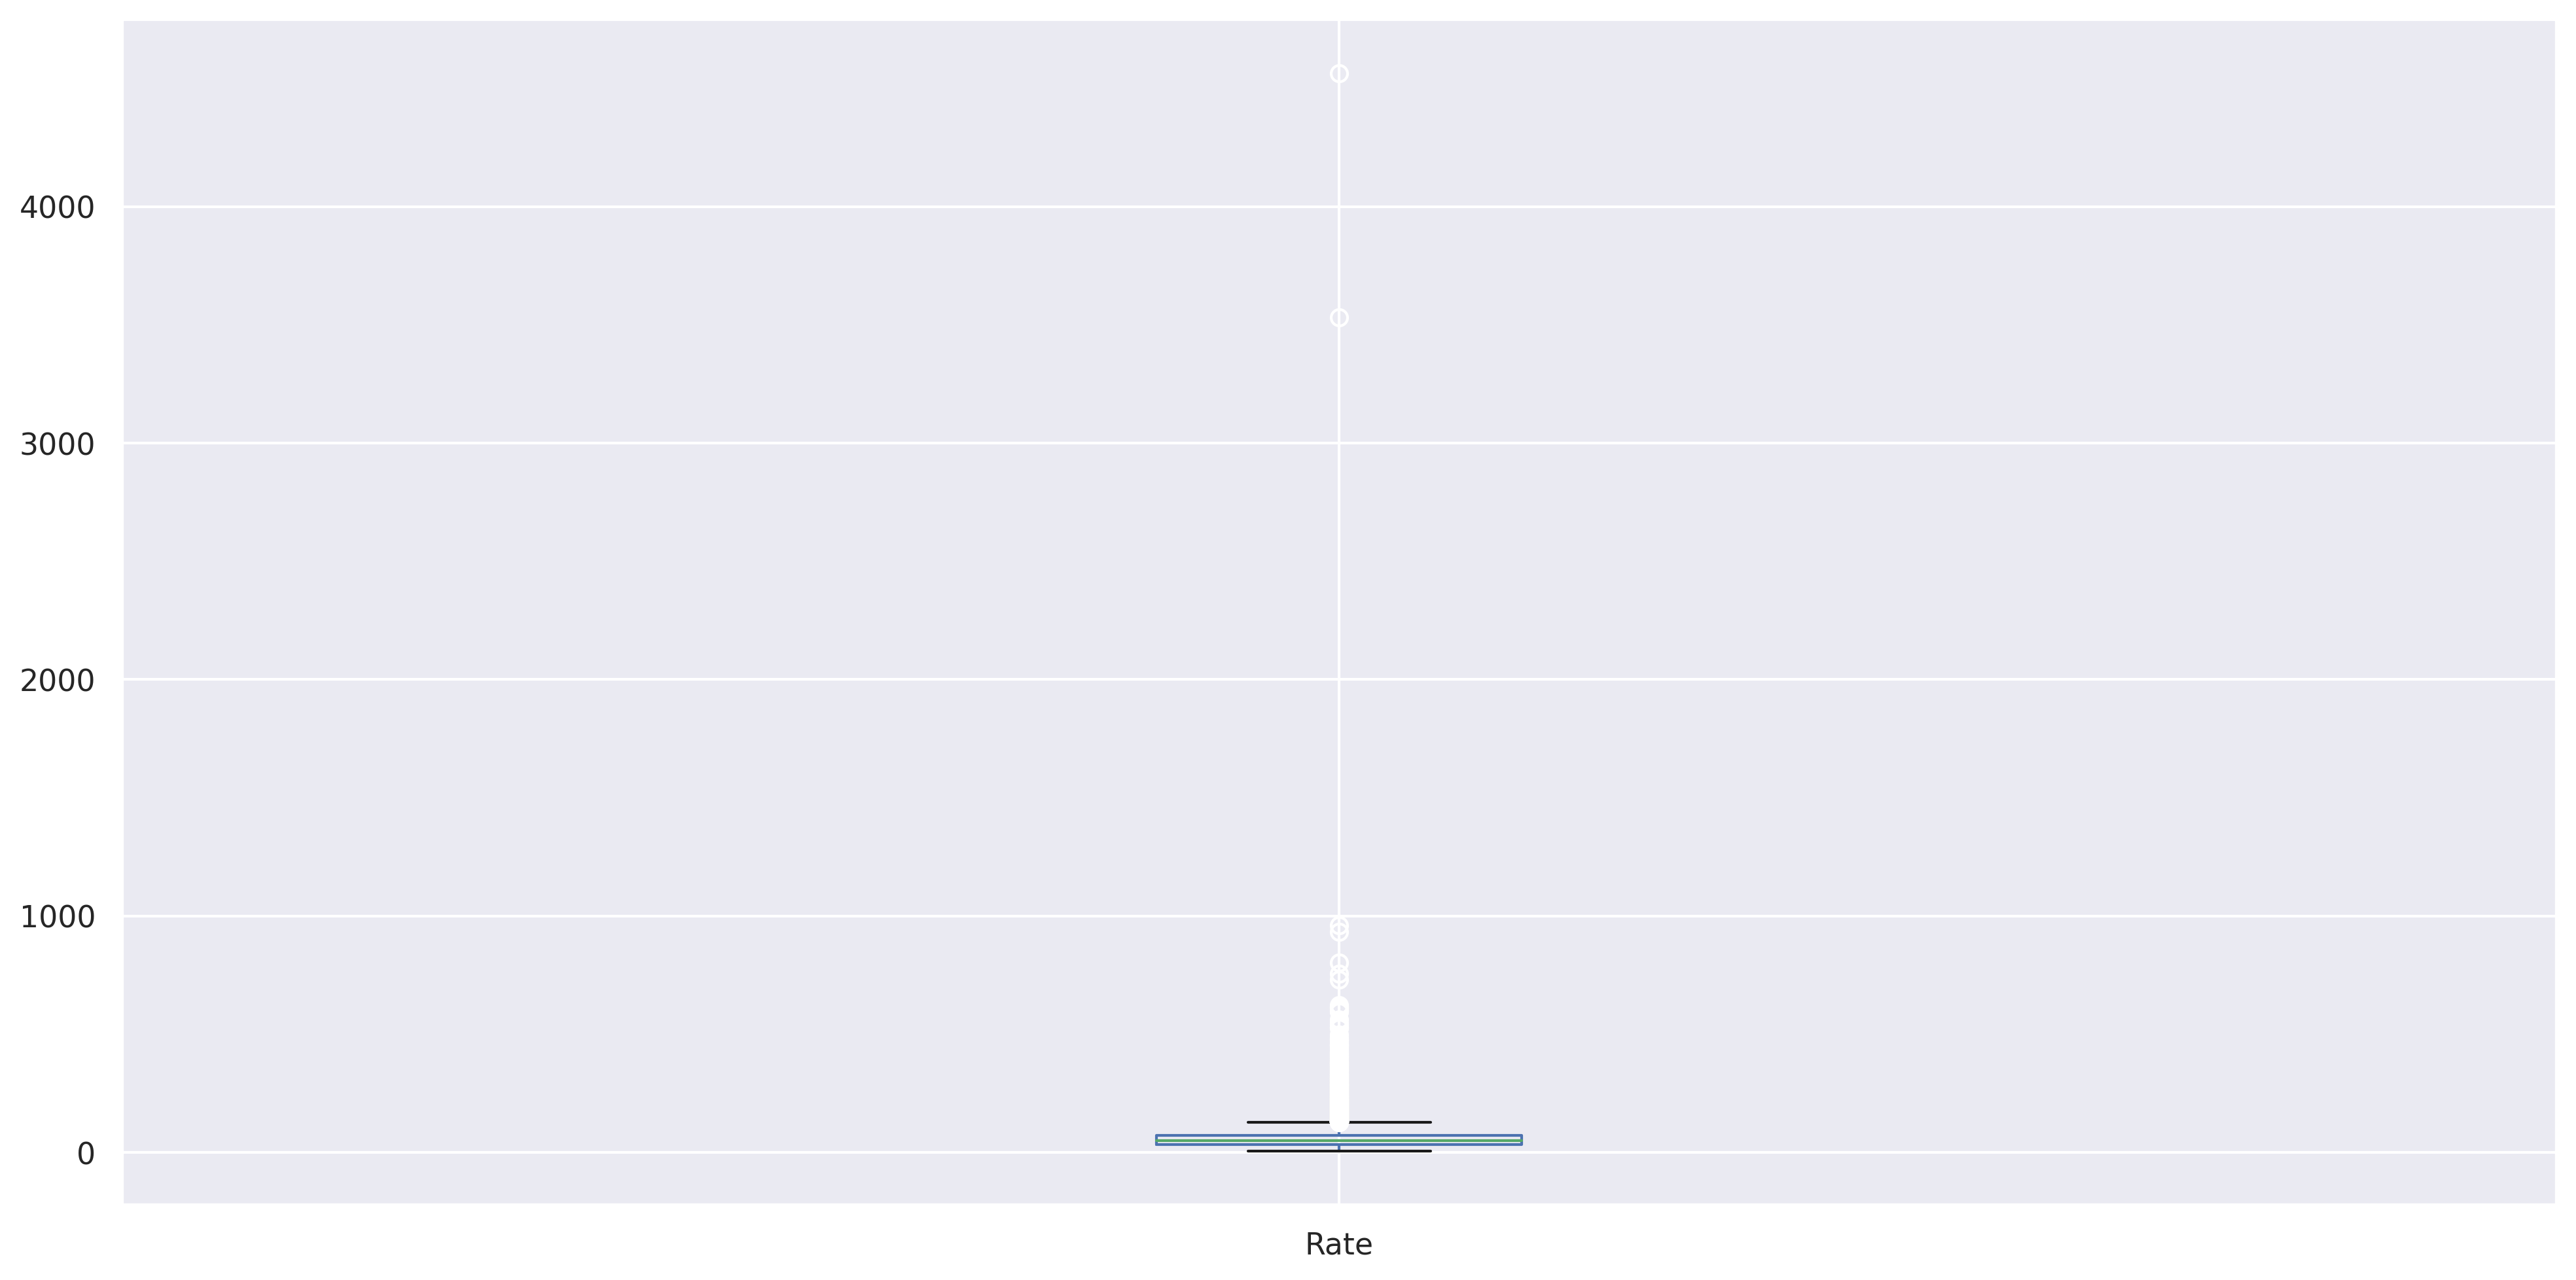

In [58]:
    df_asthma.plot(x='Year', y='Rate', kind='box')
    plt.show()

(0.0, 150.0)

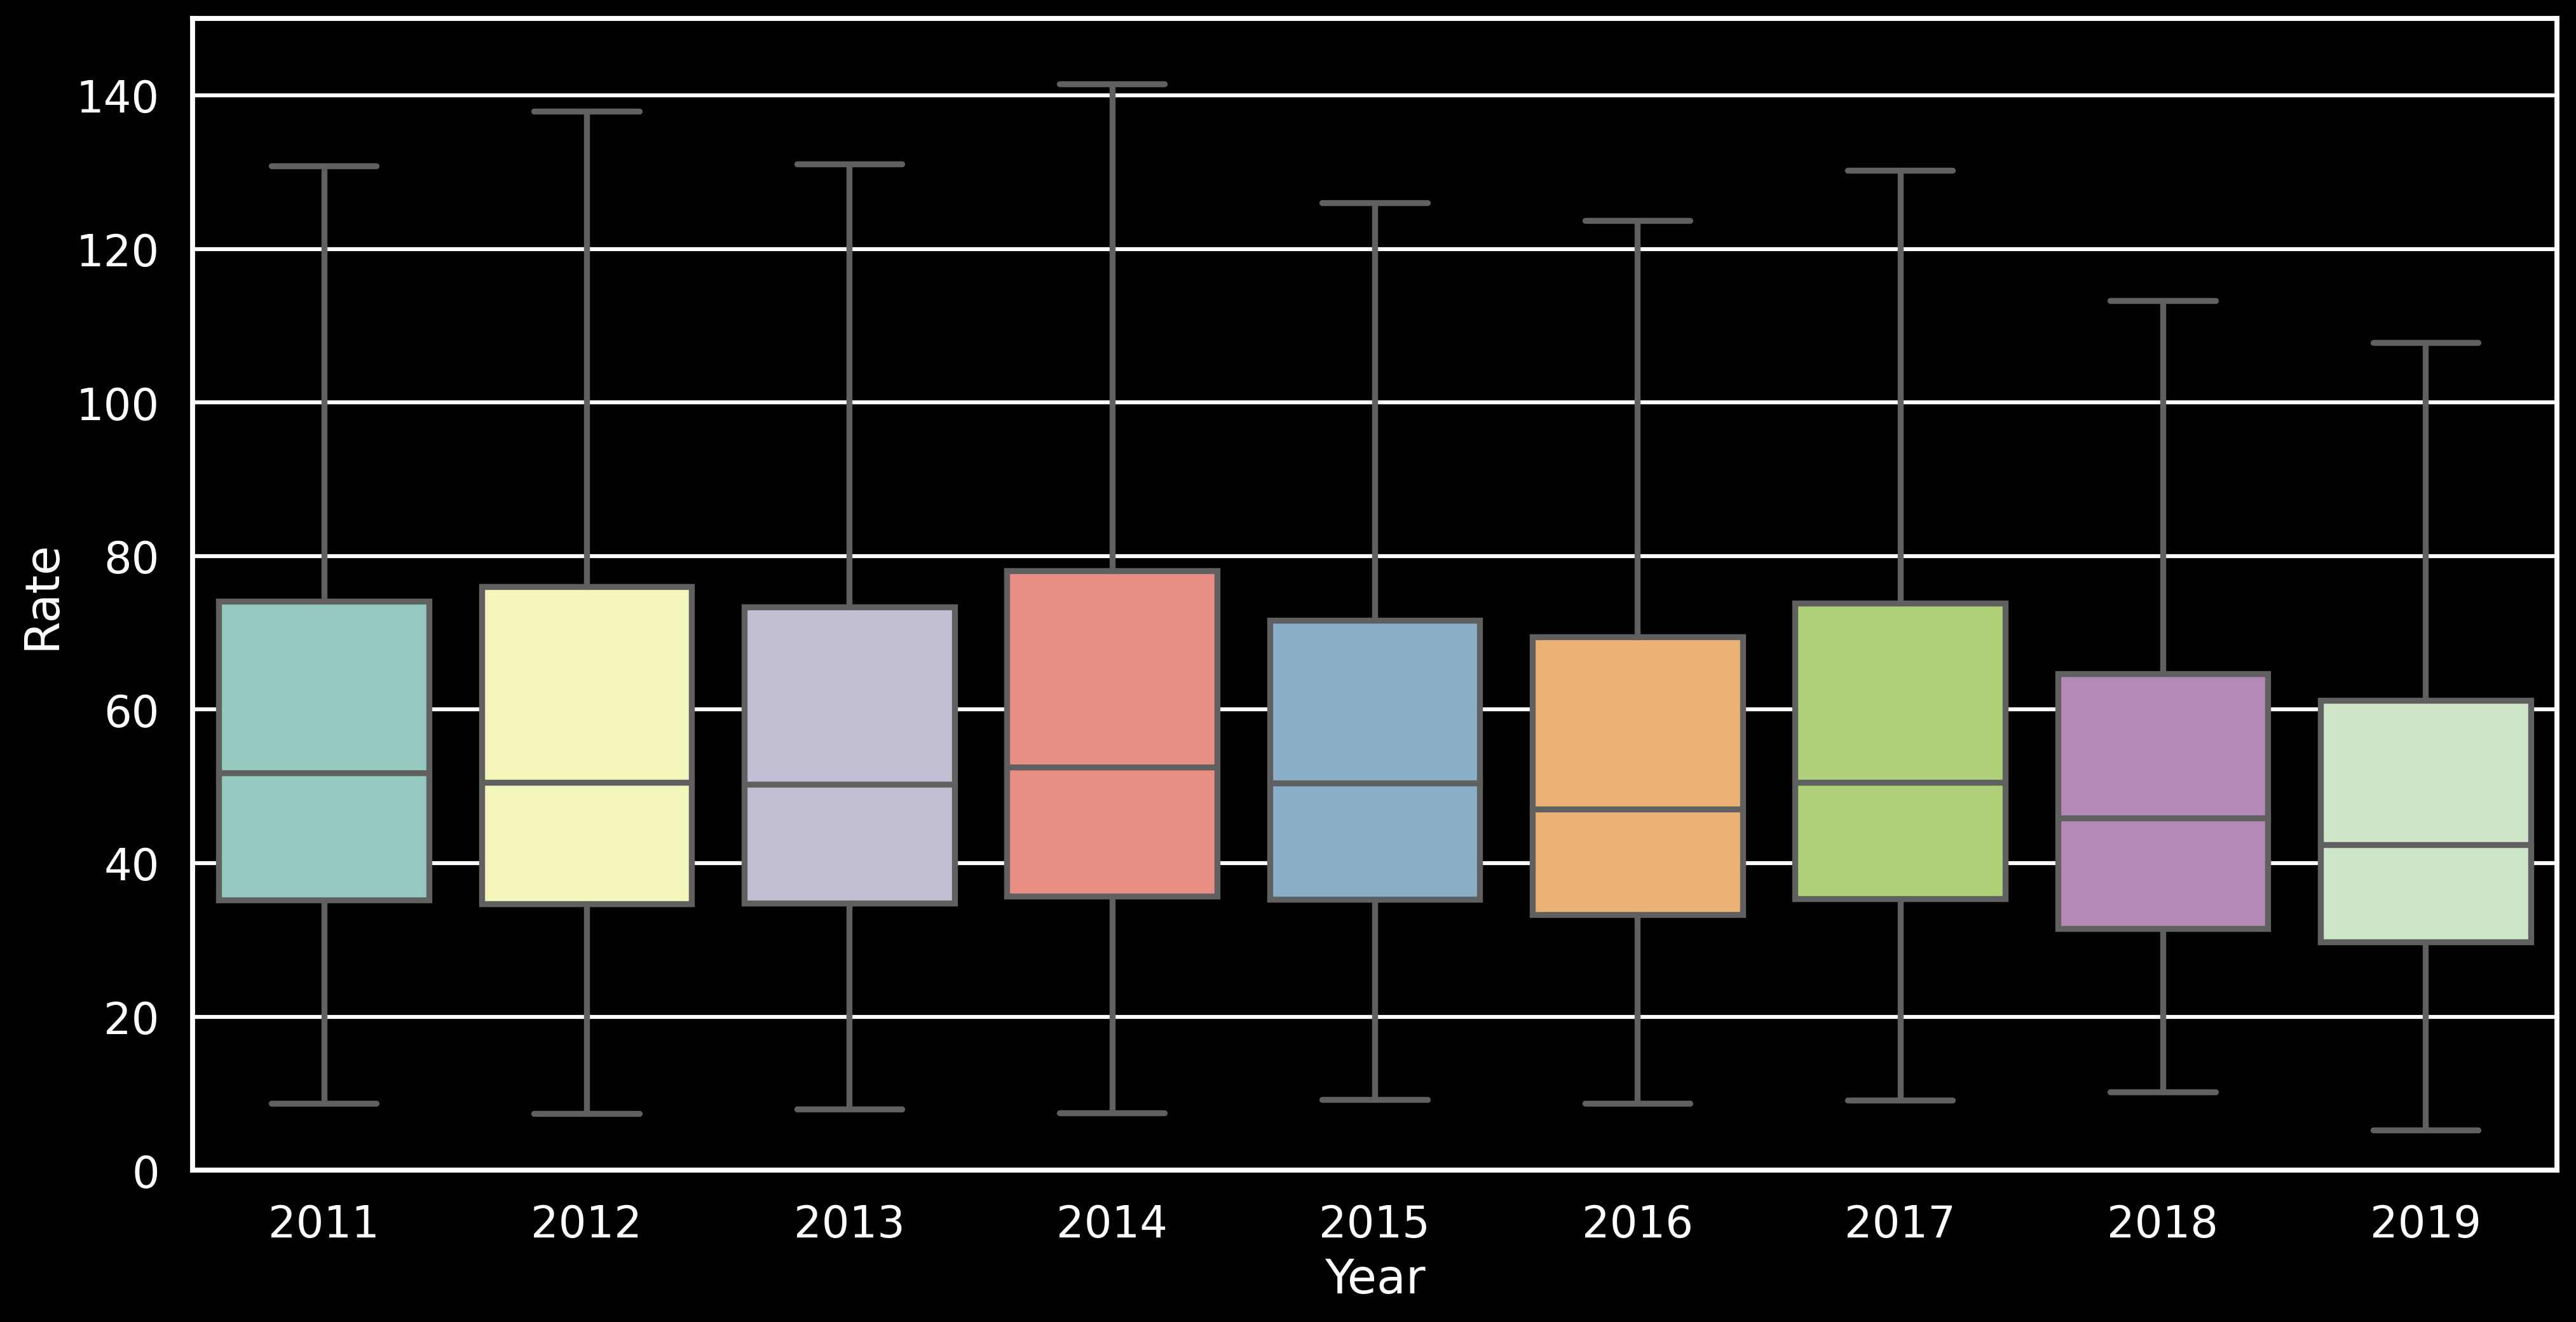

In [94]:
p=sns.boxplot(data=df_asthma, x="Year", y="Rate",fliersize=0)
p.set_ylim([0,150])

# W3-HW15

In what order should you run the following to generate and display a plot?

    plt.legend()
    x = np.linspace(1, 10, 30)
    plt.show()
    plt.ylabel('Y-Label')
    plt.plot(x, label='Data viz example plot')

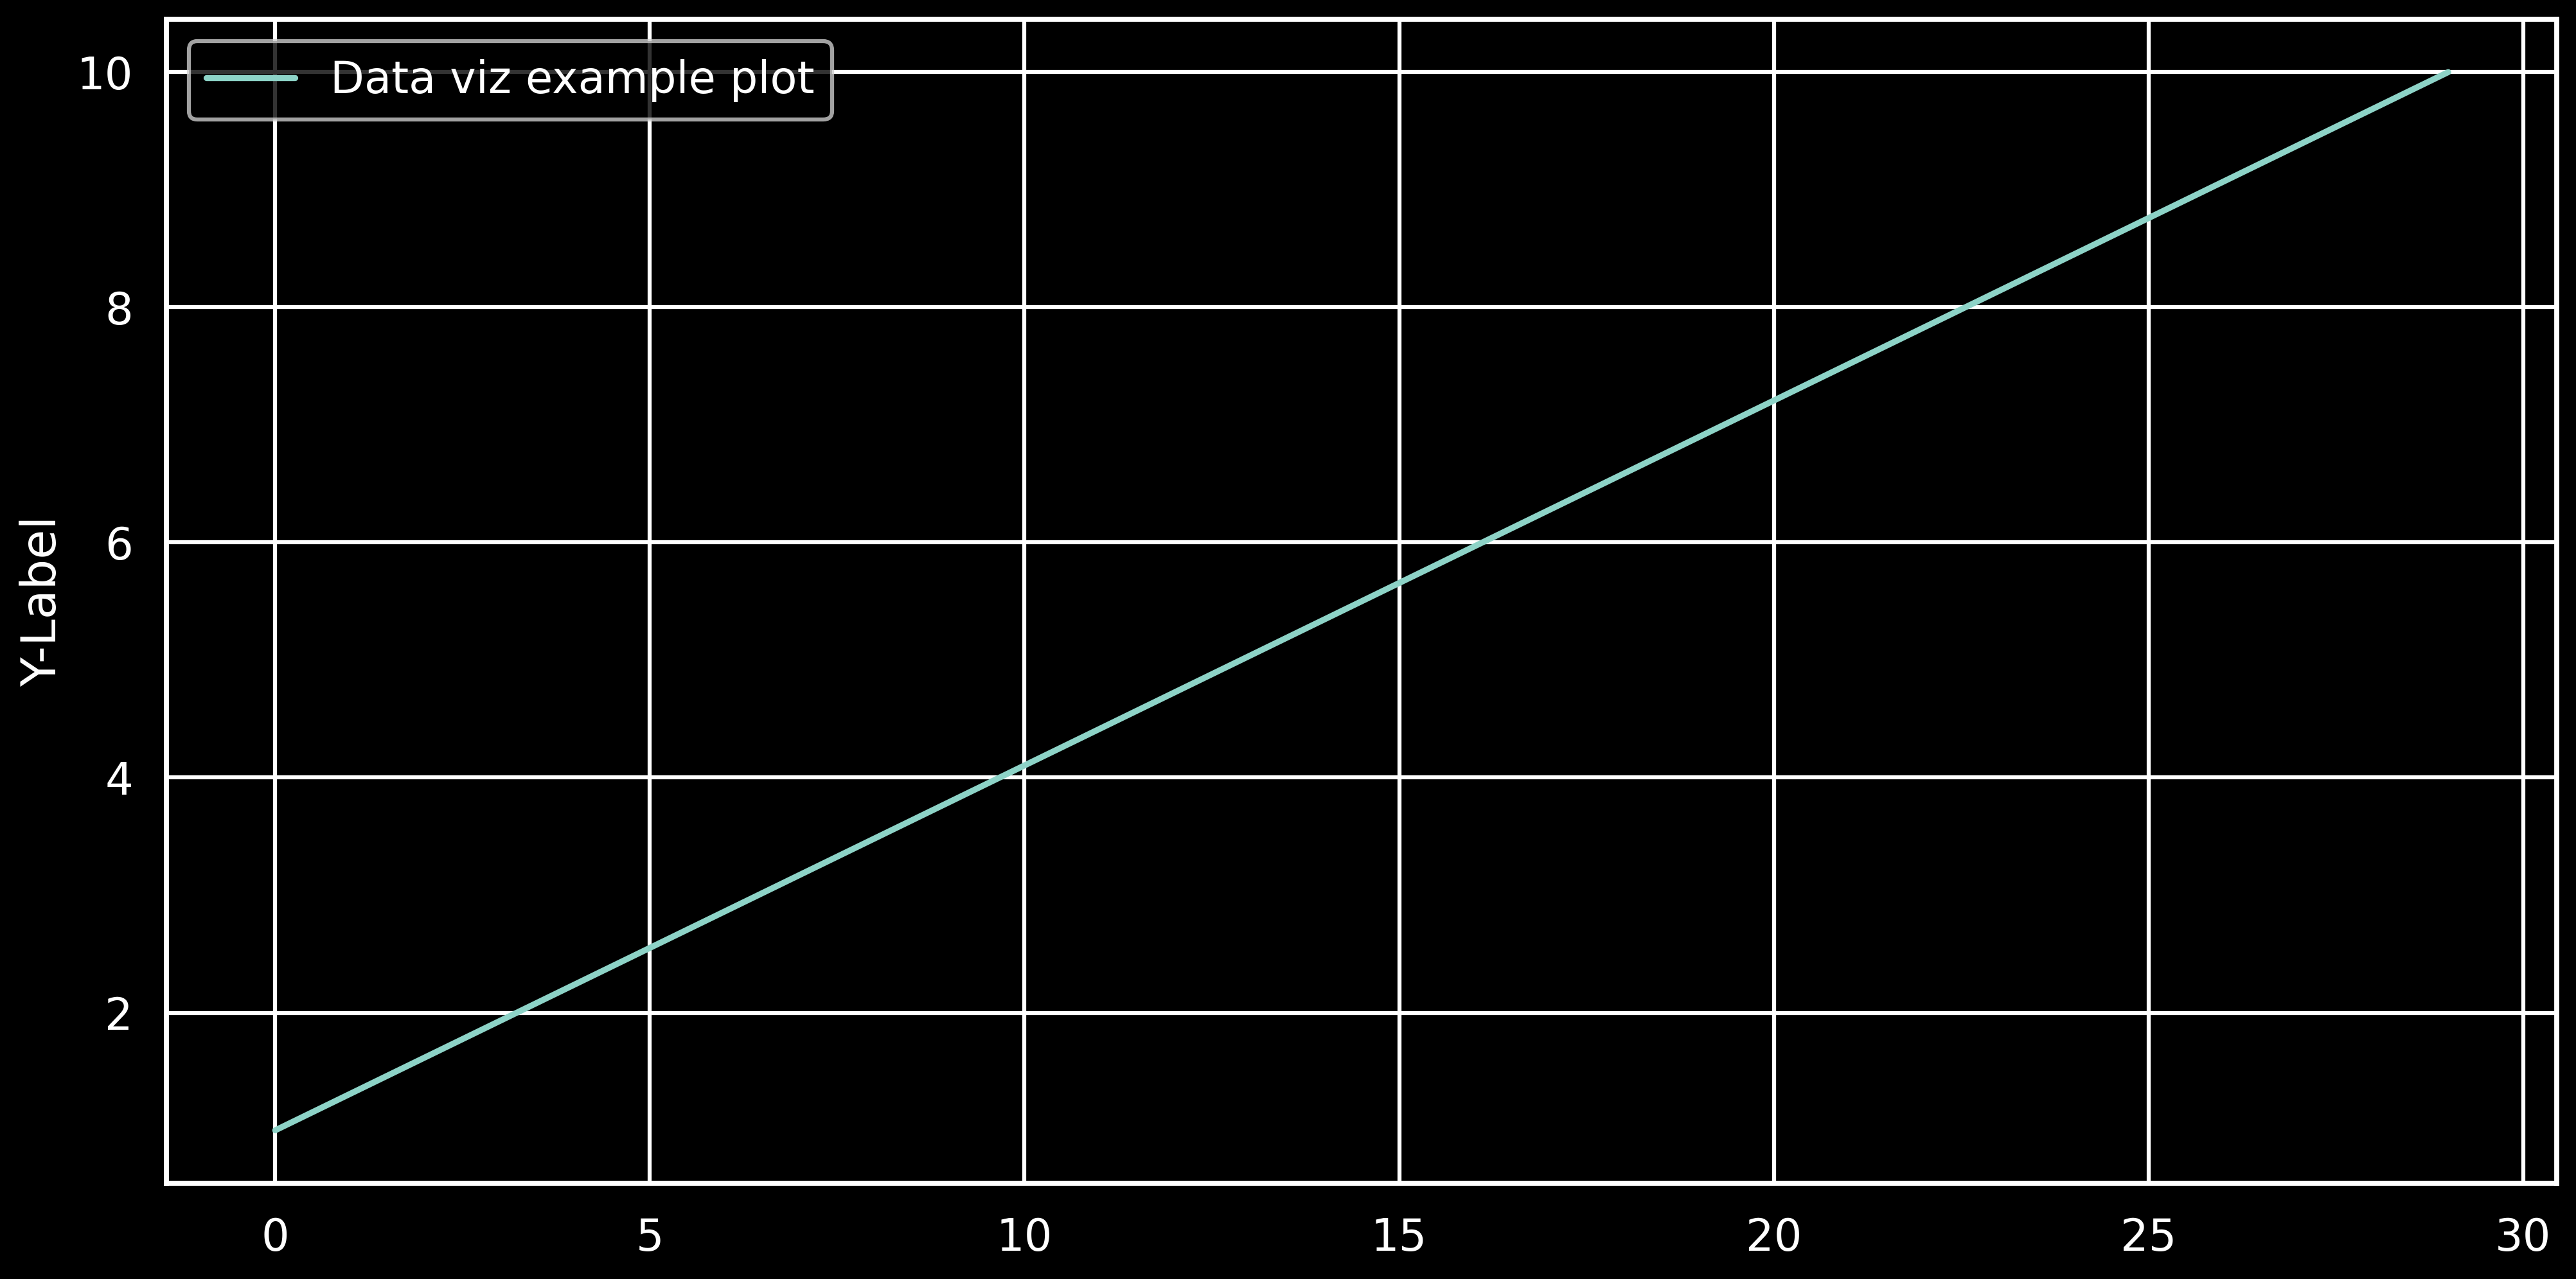

In [97]:
import numpy as np 
x = np.linspace(1, 10, 30)
plt.plot(x, label='Data viz example plot')
plt.ylabel('Y-Label')
plt.legend()
plt.show()